In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv("email.csv")

In [51]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
df.shape

(5573, 2)

In [55]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [56]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5568,False,False
5569,False,False
5570,False,False
5571,False,False


In [57]:
df.isnull().sum

<bound method DataFrame.sum of       Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5568     False    False
5569     False    False
5570     False    False
5571     False    False
5572     False    False

[5573 rows x 2 columns]>

In [58]:
df.isnull().values.any()


np.False_

In [59]:
df.dropna(inplace=True,axis=0) #inplace means modifying df than and there without making a copy of it and axis=0 means row ,axis=1 means column
df.drop_duplicates(inplace=True)


In [60]:
df.shape

(5158, 2)

In [61]:
distinct_values=df['Category'].unique()
print(distinct_values)

['ham' 'spam' '{"mode":"full"']


In [62]:
distinct_valuesm=df['Message'].nunique()
print(distinct_valuesm)

5158


In [63]:
distinct_counts=df.groupby('Category')['Message'].nunique()
print(distinct_counts)

Category
ham               4516
spam               641
{"mode":"full"       1
Name: Message, dtype: int64


[4516, 641, 1]
['ham', 'spam', '{"mode":"full"']


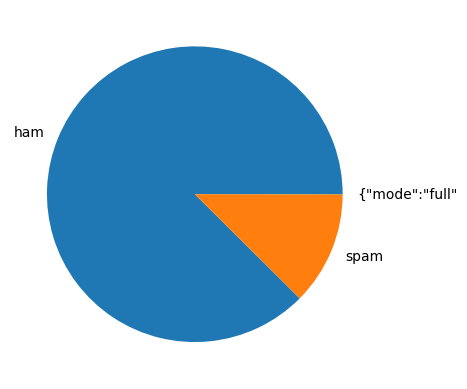

In [72]:
import matplotlib.pyplot as plt

message_count = distinct_counts.values.tolist()  # Ensure it's a flat list,Converts message counts to a list ([2, 2, 1])
distinct_category = distinct_counts.index.tolist()  # Ensure labels match,Converts category names to a list (['Ham', 'Spam', 'Promo'])

print(message_count)
print(distinct_category)
fig, ax = plt.subplots()
ax.pie(message_count, labels=distinct_category)
plt.show()




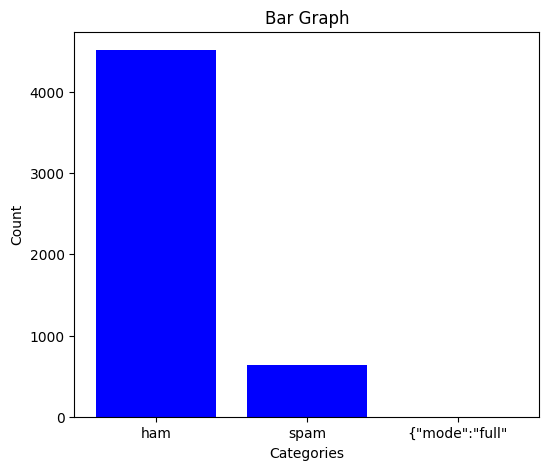

In [74]:
import matplotlib.pyplot as plt  

# Assuming distinct_counts is a pandas Series
distinct_category = distinct_counts.index.tolist()  
message_count = distinct_counts.values.tolist()  

fig, ax = plt.subplots(figsize=(6, 5))  
ax.bar(distinct_category, message_count, color='blue')  
ax.set_title("Bar Graph")  
ax.set_xlabel("Categories")  
ax.set_ylabel("Count")  # Removed the hidden character

plt.show()

In [66]:
X= df["Message"]
Y= df["Category"]
print(X.head())
print(Y.head())



0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object


In [67]:
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv= TfidfVectorizer(max_features=1500)
x_train_cv= cv.fit_transform(x_train)
x_train_cv.shape
x_test_cv= cv.transform(x_test)

In [69]:
clf= tree.DecisionTreeClassifier(max_depth=5)
clf= clf.fit(x_train_cv,y_train)
y_predict=clf.predict(x_test_cv)
print(y_predict)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


[Text(0.5, 0.9166666666666666, 'x[227] <= 0.104\ngini = 0.223\nsamples = 4126\nvalue = [3599, 526, 1]'),
 Text(0.27564102564102566, 0.75, 'x[1330] <= 0.063\ngini = 0.147\nsamples = 3773\nvalue = [3471.0, 301.0, 1.0]'),
 Text(0.38782051282051283, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'x[1471] <= 0.079\ngini = 0.108\nsamples = 3670\nvalue = [3459, 210, 1]'),
 Text(0.10256410256410256, 0.4166666666666667, 'x[493] <= 0.102\ngini = 0.092\nsamples = 3633\nvalue = [3458, 174, 1]'),
 Text(0.05128205128205128, 0.25, 'x[23] <= 0.083\ngini = 0.073\nsamples = 3562\nvalue = [3427, 134, 1]'),
 Text(0.02564102564102564, 0.08333333333333333, 'gini = 0.065\nsamples = 3546\nvalue = [3427, 118, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0]'),
 Text(0.15384615384615385, 0.25, 'x[1493] <= 0.057\ngini = 0.492\nsamples = 71\nvalue = [31.0, 40.0, 0.0]'),
 Text(0.1282051282051282, 0.08333333333333333, 'gini = 0.492\ns

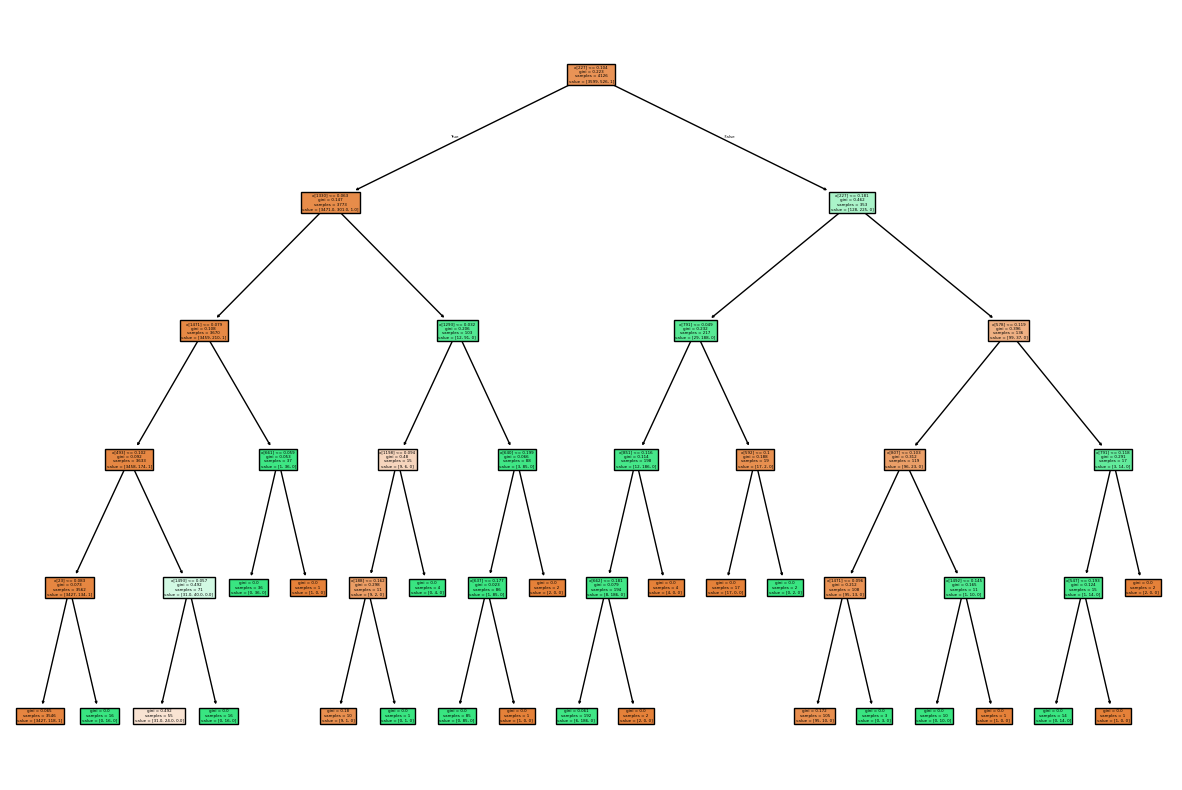

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.figure(figsize =(15,10))
tree.plot_tree(clf,filled=True)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       917
        spam       0.89      0.62      0.73       115

    accuracy                           0.95      1032
   macro avg       0.92      0.80      0.85      1032
weighted avg       0.95      0.95      0.94      1032

